<span style="font-size: 150%;color:white;background:#1155cc"> Zadanie 95 STR 145
    
<span style="font-size: 150%;color:white;background:#1155cc">SPECJALIZACJA MŁYNÓW

Przedsiębiorstwo składa się z 5 młynów. Każdy z młynów może produkować 5 rodzai mąki. Kierownictwo po dokładnych analizach doszło do wniosku, że należy wyspecjalizować młyny. Każdy młyn ma w przyszłości produkować jeden rodzaj mąki. Mąka we wszystkich młynach jestr podobnej jakości. Najważniejszym kryterium przydziału produkcji jest wydajność młynów przy produkcji każdego rodzaju mąki. Pomiedzy młynami istnieją różnice technologiczne w produkcji. W tabeli poniżej znajdują sie wydajności produkcji mąki w tonach na godzinę.

In [1]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszynistka:", "Mąka Rozczatka" ,"Mąka 550","Mąka 120","Mąka Krupska","Mąka 350"]
table.append_row(["Młyn Wręgi", 14,  8, 15, 13, 10])
table.append_row(["Młyn Żelechów", 11,  6, 17,  12, 8])
table.append_row(["Młyn Jerzewo", 15,  "brak", 17,  19, 8])
table.append_row(["Młyn Pawin", 14,  7, 15,  16, 10])
table.append_row(["Młyn Korki", "brak",  9, 12,  13, "brak"])
print(table)

+--------------+----------------+----------+----------+-------------+----------+
| Maszynistka: | Mąka Rozczatka | Mąka 550 | Mąka 120 | Mąka Krupsk | Mąka 350 |
|              |                |          |          |      a      |          |
+--------------+----------------+----------+----------+-------------+----------+
|  Młyn Wręgi  |       14       |    8     |    15    |     13      |    10    |
+--------------+----------------+----------+----------+-------------+----------+
| Młyn Żelechó |       11       |    6     |    17    |     12      |    8     |
|      w       |                |          |          |             |          |
+--------------+----------------+----------+----------+-------------+----------+
| Młyn Jerzewo |       15       |   brak   |    17    |     19      |    8     |
+--------------+----------------+----------+----------+-------------+----------+
|  Młyn Pawin  |       14       |    7     |    15    |     16      |    10    |
+--------------+------------


<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

zero-jeden   - dlaczego? bo jest to zmienna decyzyjna, to jest przydział. jeden - ktoś dostaje przydział, 
zero ktoś nie dostaje przydziału do tej konkretnej roboty. 

<span style="font-size: 130%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

ilość set sztuk produkcji na minutę - to kryterium wydajności, czym, więcej tym lepiej.

<span style="font-size: 130%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>


zmiennymi decyzyjnymi jest tutaj przydział, liczba 1 lub 0. Każdy zakład ma produkować tylko jeden produkt!
Specjalizacja zakładów.
jest równa ilość produktów (5) i zakładów (5) więc każdy zakład będzie produkował tylko jeden rodzaj produktu.
Nie trzeba robić produktu fantomowego.

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}+x_{15}} & = 1 & (Wręgi)\\
{x_{21}+x_{22}+x_{23}+x_{24}+x_{35}} & = 1 & (Żelechów)\\
{x_{31}+x_{33}+x_{34}+x_{35}} & = 1 & (Jerzewo)\\
{x_{41}+x_{42}+x_{43}+x_{44}+x_{45}} & = 1 & (Pawin)\\
{x_{52}+x_{53}+x_{54}} & = 1 & (Korki)\\
\end{align}
\right. 
$

<span style="font-size: 130%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każda robota może być przydzielona tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 & (Rozczatka)\\
{x_{12}+x_{22}+x_{42}+x_{52}} & = 1 & (550)\\
{x_{13}+x_{23}+x_{33}+x_{43}+x_{53}} & = 1 & (120)\\
{x_{14}+x_{24}+x_{34}+x_{44}+x_{54}} & = 1 & (Krupska)\\
{x_{15}+x_{25}+x_{35}+x_{45}} & = 1 & (350)\\
\end{align}
\right. 
$


<span style="font-size: 130%;color:#0000ff"> Krok 5: jaka jest funkcja celu?</span>

Zmaksymalizować efektywność pracy.

$\bbox[5px,border:1px solid red]
{
\\
F(x_{i,j})\\
=14x_{11}+8x_{12}+15x_{13}+13x_{14}+10x_{15}\\
+11x_{21}+6x_{22}+17x_{23}+ 12x_{24}+8x_{25}\\
+15x_{31}+17x_{33}+ 19x_{34}+8x_{35}\\
+14x_{41}+7x_{42}+15x_{43}+ 16x_{44}+10x_{45}\\
+9x_{52}+12x_{53}+ 13x_{54}\\
\to  max
\qquad 
} $

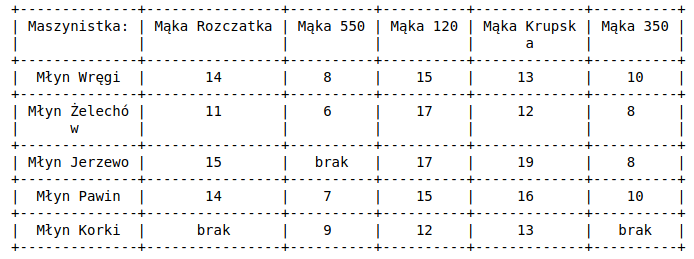

<span style="font-size: 150%;color:white;background:#bf9000">METODA ZWYKŁA rozwiązania tego zadania

In [2]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Specjalizacja młynów",LpMaximize)

/home/wojciech/anaconda3/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Wstawianie pierwszych warunków ograniczających: ograniczeniami nieujemności

#### $
\left\{
\begin{align} 
{x_{11}} & \geqslant 0 & (4)\\
{x_{12}} & \geqslant 0 & (5)\\
{x_{13}} & \geqslant 0 & (5)\\
{x_{14}} & \geqslant 0 & (5)\\
{x_{15}} & \geqslant 0 & (5)\\
{x_{16}} & \geqslant 0 & (5)\\
{x_{21}} & \geqslant 0 & (5)\\
{x_{22}} & \geqslant 0 & (5)\\
{x_{23}} & \geqslant 0 & (5)\\
{x_{24}} & \geqslant 0 & (5)\\
{x_{25}} & \geqslant 0 & (5)\\
{x_{26}} & \geqslant 0 & (5)\\
{x_{31}} & \geqslant 0 & (5)\\
{x_{32}} & \geqslant 0 & (5)\\
{x_{33}} & \geqslant 0 & (5)\\
{x_{34}} & \geqslant 0 & (5)\\
{x_{35}} & \geqslant 0 & (5)\\
{x_{36}} & \geqslant 0 & (5)\\
{x_{41}} & \geqslant 0 & (5)\\
{x_{42}} & \geqslant 0 & (5)\\
{x_{43}} & \geqslant 0 & (5)\\
{x_{44}} & \geqslant 0 & (5)\\
{x_{45}} & \geqslant 0 & (5)\\
{x_{46}} & \geqslant 0 & (5)\\
{x_{51}} & \geqslant 0 & (5)\\
{x_{52}} & \geqslant 0 & (5)\\
{x_{53}} & \geqslant 0 & (5)\\
{x_{54}} & \geqslant 0 & (5)\\
{x_{55}} & \geqslant 0 & (5)\\
{x_{56}} & \geqslant 0 & (5)\\
{x_{61}} & \geqslant 0 & (5)\\
{x_{62}} & \geqslant 0 & (5)\\
{x_{63}} & \geqslant 0 & (5)\\
{x_{64}} & \geqslant 0 & (5)\\
{x_{65}} & \geqslant 0 & (5)\\
{x_{66}} & \geqslant 0 & (5)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:white;background:#bf9000">METODA MACIERZOWA rozwiązania tego zadania

In [3]:
# "Continuous"
# "Integer"

x11=LpVariable("x11",lowBound=0,upBound=None, cat="Integer")
x12=LpVariable("x12",lowBound=0,upBound=None, cat="Integer")
x13=LpVariable("x13",lowBound=0,upBound=None, cat="Integer")
x14=LpVariable("x14",lowBound=0,upBound=None, cat="Integer")
x15=LpVariable("x15",lowBound=0,upBound=None, cat="Integer")
x16=LpVariable("x16",lowBound=0,upBound=None, cat="Integer")

x21=LpVariable("x21",lowBound=0,upBound=None, cat="Integer")
x22=LpVariable("x22",lowBound=0,upBound=None, cat="Integer")
x23=LpVariable("x23",lowBound=0,upBound=None, cat="Integer")
x24=LpVariable("x24",lowBound=0,upBound=None, cat="Integer")
x25=LpVariable("x25",lowBound=0,upBound=None, cat="Integer")
x26=LpVariable("x26",lowBound=0,upBound=None, cat="Integer")

x31=LpVariable("x31",lowBound=0,upBound=None, cat="Integer")
x32=LpVariable("x32",lowBound=0,upBound=None, cat="Integer")
x33=LpVariable("x33",lowBound=0,upBound=None, cat="Integer")
x34=LpVariable("x34",lowBound=0,upBound=None, cat="Integer") 
x35=LpVariable("x35",lowBound=0,upBound=None, cat="Integer")
x36=LpVariable("x36",lowBound=0,upBound=None, cat="Integer") 

x41=LpVariable("x41",lowBound=0,upBound=None, cat="Integer")  
x42=LpVariable("x42",lowBound=0,upBound=None, cat="Integer")  
x43=LpVariable("x43",lowBound=0,upBound=None, cat="Integer")  
x44=LpVariable("x44",lowBound=0,upBound=None, cat="Integer")  
x45=LpVariable("x45",lowBound=0,upBound=None, cat="Integer")  
x46=LpVariable("x46",lowBound=0,upBound=None, cat="Integer")  

x51=LpVariable("x51",lowBound=0,upBound=None, cat="Integer")  
x52=LpVariable("x52",lowBound=0,upBound=None, cat="Integer")  
x53=LpVariable("x53",lowBound=0,upBound=None, cat="Integer")  
x54=LpVariable("x54",lowBound=0,upBound=None, cat="Integer")  
x55=LpVariable("x55",lowBound=0,upBound=None, cat="Integer")  
x56=LpVariable("x56",lowBound=0,upBound=None, cat="Integer") 

x61=LpVariable("x61",lowBound=0,upBound=None, cat="Integer")  
x62=LpVariable("x62",lowBound=0,upBound=None, cat="Integer")  
x63=LpVariable("x63",lowBound=0,upBound=None, cat="Integer")  
x64=LpVariable("x64",lowBound=0,upBound=None, cat="Integer")  
x65=LpVariable("x65",lowBound=0,upBound=None, cat="Integer")  
x66=LpVariable("x66",lowBound=0,upBound=None, cat="Integer") 

### Dodajemy do platformy funkcje celu

Zmaksymalizować efektywność pracy.

$
{
\\
F(x_{i,j})\\
=14x_{11}+8x_{12}+15x_{13}+13x_{14}+10x_{15}\\
+11x_{21}+6x_{22}+17x_{23}+ 12x_{24}+8x_{25}\\
+15x_{31}+17x_{33}+ 19x_{34}+8x_{35}\\
+14x_{41}+7x_{42}+15x_{43}+ 16x_{44}+10x_{45}\\
+9x_{52}+12x_{53}+ 13x_{54}\\
\to  max
\qquad 
} $

In [4]:
# objective function
prob +=14*x11+8*x12+15*x13+13*x14+10*x15+11*x21+6*x22+17*x23+12*x24+8*x25+15*x31+17*x33+19*x34+8*x35+14*x41+7*x42+15*x43+16*x44+10*x45+9*x52+12*x53+13*x54, "maksymalizacja wydajności produkcji "

In [5]:
print(prob)

Specjalizacja_młynów:
MAXIMIZE
14*x11 + 8*x12 + 15*x13 + 13*x14 + 10*x15 + 11*x21 + 6*x22 + 17*x23 + 12*x24 + 8*x25 + 15*x31 + 17*x33 + 19*x34 + 8*x35 + 14*x41 + 7*x42 + 15*x43 + 16*x44 + 10*x45 + 9*x52 + 12*x53 + 13*x54 + 0
VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x25 Integer
0 <= x31 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x35 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer
0 <= x45 Integer
0 <= x52 Integer
0 <= x53 Integer
0 <= x54 Integer



In [6]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszynistka:", "Mąka Rozczatka" ,"Mąka 550","Mąka 120","Mąka Krupska","Mąka 350"]
table.append_row(["Młyn Wręgi", 14,  8, 15, 13, 10])
table.append_row(["Młyn Żelechów", 11,  6, 17,  12, 8])
table.append_row(["Młyn Jerzewo", 15,  "brak", 17,  19, 8])
table.append_row(["Młyn Pawin", 14,  7, 15,  16, 10])
table.append_row(["Młyn Korki", "brak",  9, 12,  13, "brak"])
print(table)

+--------------+----------------+----------+----------+-------------+----------+
| Maszynistka: | Mąka Rozczatka | Mąka 550 | Mąka 120 | Mąka Krupsk | Mąka 350 |
|              |                |          |          |      a      |          |
+--------------+----------------+----------+----------+-------------+----------+
|  Młyn Wręgi  |       14       |    8     |    15    |     13      |    10    |
+--------------+----------------+----------+----------+-------------+----------+
| Młyn Żelechó |       11       |    6     |    17    |     12      |    8     |
|      w       |                |          |          |             |          |
+--------------+----------------+----------+----------+-------------+----------+
| Młyn Jerzewo |       15       |   brak   |    17    |     19      |    8     |
+--------------+----------------+----------+----------+-------------+----------+
|  Młyn Pawin  |       14       |    7     |    15    |     16      |    10    |
+--------------+------------

#### $
\left\{
\begin{align} 
{x_{11}+x_{12}+x_{13}+x_{14}+x_{15}} & = 1 & (Wręgi)\\
{x_{21}+x_{22}+x_{23}+x_{24}+x_{35}} & = 1 & (Żelechów)\\
{x_{31}+x_{33}+x_{34}+x_{35}} & = 1 & (Jerzewo)\\
{x_{41}+x_{42}+x_{43}+x_{44}+x_{45}} & = 1 & (Pawin)\\
{x_{52}+x_{53}+x_{54}} & = 1 & (Korki)\\
\end{align}
\right. 
$

<span style="font-size: 130%;color:#0000ff"> Krok 4: ograniczenie pośrednie - każda robota może być przydzielona tylko raz </span>
#### $
\left\{
\begin{align} 
{x_{11}+x_{21}+x_{31}+x_{41}} & = 1 & (Rozczatka)\\
{x_{12}+x_{22}+x_{42}+x_{52}} & = 1 & (550)\\
{x_{13}+x_{23}+x_{33}+x_{43}+x_{53}} & = 1 & (120)\\
{x_{14}+x_{24}+x_{34}+x_{44}+x_{54}} & = 1 & (Krupska)\\
{x_{15}+x_{25}+x_{35}+x_{45}} & = 1 & (350)\\
\end{align}
\right. 
$

In [7]:
# OGRANICZENIA DLA PRODUKTÓW
prob += x11 + x21 + x31+ x41       == 1   # ROZCZATKA
prob += x12 + x22      + x42+ x52  == 1   # 550
prob += x13 + x23 + x33+ x43+ x53  == 1   # 120
prob += x14 + x24 + x34+ x44+ x54  == 1   # KRUPSKA
prob += x15 + x25 + x35+ x45       == 1   # 350

In [8]:
# OGRANICZENIA DLA młynów
prob += x11 + x12 + x13 + x14+ x15 == 1  # WRĘGI
prob += x21 + x22 + x23 + x24+ x25 == 1  # ŻELECHÓW
prob += x31       + x33 + x34+ x35 == 1  # JERZEWO
prob += x41 + x42 + x43 + x44+ x45 == 1  # PAWIN
prob +=       x52 + x53 + x54      == 1  # KORKI

In [9]:
print(prob)

Specjalizacja_młynów:
MAXIMIZE
14*x11 + 8*x12 + 15*x13 + 13*x14 + 10*x15 + 11*x21 + 6*x22 + 17*x23 + 12*x24 + 8*x25 + 15*x31 + 17*x33 + 19*x34 + 8*x35 + 14*x41 + 7*x42 + 15*x43 + 16*x44 + 10*x45 + 9*x52 + 12*x53 + 13*x54 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x42 + x52 = 1

_C3: x13 + x23 + x33 + x43 + x53 = 1

_C4: x14 + x24 + x34 + x44 + x54 = 1

_C5: x15 + x25 + x35 + x45 = 1

_C6: x11 + x12 + x13 + x14 + x15 = 1

_C7: x21 + x22 + x23 + x24 + x25 = 1

_C8: x31 + x33 + x34 + x35 = 1

_C9: x41 + x42 + x43 + x44 + x45 = 1

_C10: x52 + x53 + x54 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x25 Integer
0 <= x31 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x35 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer
0 <= x45 Integer
0 <= x52 Integer
0 <= x53 Integer
0 <= x54 Integer



In [10]:
print(prob)

Specjalizacja_młynów:
MAXIMIZE
14*x11 + 8*x12 + 15*x13 + 13*x14 + 10*x15 + 11*x21 + 6*x22 + 17*x23 + 12*x24 + 8*x25 + 15*x31 + 17*x33 + 19*x34 + 8*x35 + 14*x41 + 7*x42 + 15*x43 + 16*x44 + 10*x45 + 9*x52 + 12*x53 + 13*x54 + 0
SUBJECT TO
_C1: x11 + x21 + x31 + x41 = 1

_C2: x12 + x22 + x42 + x52 = 1

_C3: x13 + x23 + x33 + x43 + x53 = 1

_C4: x14 + x24 + x34 + x44 + x54 = 1

_C5: x15 + x25 + x35 + x45 = 1

_C6: x11 + x12 + x13 + x14 + x15 = 1

_C7: x21 + x22 + x23 + x24 + x25 = 1

_C8: x31 + x33 + x34 + x35 = 1

_C9: x41 + x42 + x43 + x44 + x45 = 1

_C10: x52 + x53 + x54 = 1

VARIABLES
0 <= x11 Integer
0 <= x12 Integer
0 <= x13 Integer
0 <= x14 Integer
0 <= x15 Integer
0 <= x21 Integer
0 <= x22 Integer
0 <= x23 Integer
0 <= x24 Integer
0 <= x25 Integer
0 <= x31 Integer
0 <= x33 Integer
0 <= x34 Integer
0 <= x35 Integer
0 <= x41 Integer
0 <= x42 Integer
0 <= x43 Integer
0 <= x44 Integer
0 <= x45 Integer
0 <= x52 Integer
0 <= x53 Integer
0 <= x54 Integer



### Rozwiązanie problemu

In [11]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [12]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x11 = 1
x12 = 0
x13 = 0
x14 = 0
x15 = 0
x21 = 0
x22 = 0
x23 = 1
x24 = 0
x25 = 0
x31 = 0
x33 = 0
x34 = 1
x35 = 0
x41 = 0
x42 = 0
x43 = 0
x44 = 0
x45 = 1
x52 = 1
x53 = 0
x54 = 0


In [13]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 69


In [14]:
x11 = 1
x12 = 0
x13 = 0
x14 = 0
x15 = 0
x21 = 0
x22 = 0
x23 = 1
x24 = 0
x25 = 0
x31 = 0
x33 = 0
x34 = 1
x35 = 0
x41 = 0
x42 = 0
x43 = 0
x44 = 0
x45 = 1
x52 = 1
x53 = 0
x54 = 0

In [15]:
Wydajność =14*x11+8*x12+15*x13+13*x14+10*x15+11*x21+6*x22+17*x23+12*x24+8*x25+15*x31+17*x33+19*x34+8*x35+14*x41+7*x42+15*x43+16*x44+10*x45+9*x52+12*x53+13*x54
Wydajność

69

<span style="font-size: 130%;color:#0000ff">MAKSYMAKLIZACJA WYDAJNOŚCI TO 41 TYS. SZTUK WYROBÓW NA MINUTĘ

<span style="font-size: 150%;color:white;background:#bf9000">METODA MACIERZOWA rozwiązania tego zadania

In [16]:
from pulp import *

# Tworze listę zakładów
Warehouses = ["Zakład 1","Zakład 2","Zakład 3","Zakład 4","Zakład 5"]

# Tworze słownik ile każdy zakład może maksymalnie produkować detali
supply = {"Zakład 1": 1,
          "Zakład 2": 1,
          "Zakład 3": 1,
          "Zakład 4": 1,
          "Zakład 5": 1
         }

In [17]:
# Tworzę listę produktów
Bars = ["produkt_1", "produkt_2", "produkt_3","produkt_4","produkt_5"]

# dokładna ilość detali do produkcji
demand = {"produkt_1": 1,
        "produkt_2": 1,
        "produkt_3": 1,
        "produkt_4": 1,
        "produkt_5": 1  
        }
print('Warehouses:',Warehouses)
print('supply:',supply)
print('Bars:',Bars)
print('Demand:',demand)

Warehouses: ['Zakład 1', 'Zakład 2', 'Zakład 3', 'Zakład 4', 'Zakład 5']
supply: {'Zakład 1': 1, 'Zakład 2': 1, 'Zakład 3': 1, 'Zakład 4': 1, 'Zakład 5': 1}
Bars: ['produkt_1', 'produkt_2', 'produkt_3', 'produkt_4', 'produkt_5']
Demand: {'produkt_1': 1, 'produkt_2': 1, 'produkt_3': 1, 'produkt_4': 1, 'produkt_5': 1}


### <span style="color:blue"> Są w różnych kategoriach. maszyny są w minutach, detale są w sztukach

In [18]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Maszynistka:", "produkt_1","produkt_2","produkt_3","produkt_4","produkt_5"]
table.append_row(["Zakład 1", 4,  3, 7, 12, 3])
table.append_row(["Zakład 2", 2,  5, 8,  1, 9])
table.append_row(["Zakład 3", 6,  4, 8,  8, 6])
table.append_row(["Zakład 4", 3,  2, 4,  5, 6])
table.append_row(["Zakład 5", 7,  9, 3,  2, 5])
print(table)

+--------------+-----------+-----------+-----------+-----------+-----------+
| Maszynistka: | produkt_1 | produkt_2 | produkt_3 | produkt_4 | produkt_5 |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 1   |     4     |     3     |     7     |    12     |     3     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 2   |     2     |     5     |     8     |     1     |     9     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 3   |     6     |     4     |     8     |     8     |     6     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 4   |     3     |     2     |     4     |     5     |     6     |
+--------------+-----------+-----------+-----------+-----------+-----------+
|   Zakład 5   |     7     |     9     |     3     |     2     |     5     |
+--------------+-----------+-----------+-----------+-----------+-----------+

In [19]:

        #produkty
        #1, 2, 3,  4, 5   

costs = [   
        [4, 3, 7, 12, 3],  #zakład_1
        [2, 5, 8,  1, 9],  #zakład_2
        [6, 4, 8,  8, 6],  #zakład_3
        [3, 2, 4,  5, 6],  #zakład_4
        [7, 9, 3,  2, 5]   #zakład_5
         ]

In [20]:
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)
costs

{'Zakład 1': {'produkt_1': 4,
  'produkt_2': 3,
  'produkt_3': 7,
  'produkt_4': 12,
  'produkt_5': 3},
 'Zakład 2': {'produkt_1': 2,
  'produkt_2': 5,
  'produkt_3': 8,
  'produkt_4': 1,
  'produkt_5': 9},
 'Zakład 3': {'produkt_1': 6,
  'produkt_2': 4,
  'produkt_3': 8,
  'produkt_4': 8,
  'produkt_5': 6},
 'Zakład 4': {'produkt_1': 3,
  'produkt_2': 2,
  'produkt_3': 4,
  'produkt_4': 5,
  'produkt_5': 6},
 'Zakład 5': {'produkt_1': 7,
  'produkt_2': 9,
  'produkt_3': 3,
  'produkt_4': 2,
  'produkt_5': 5}}

In [21]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMaximize)
print(prob)

Beer_Distribution_Problem:
MAXIMIZE
None
VARIABLES



In [22]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]
print(Routes)

[('Zakład 1', 'produkt_1'), ('Zakład 1', 'produkt_2'), ('Zakład 1', 'produkt_3'), ('Zakład 1', 'produkt_4'), ('Zakład 1', 'produkt_5'), ('Zakład 2', 'produkt_1'), ('Zakład 2', 'produkt_2'), ('Zakład 2', 'produkt_3'), ('Zakład 2', 'produkt_4'), ('Zakład 2', 'produkt_5'), ('Zakład 3', 'produkt_1'), ('Zakład 3', 'produkt_2'), ('Zakład 3', 'produkt_3'), ('Zakład 3', 'produkt_4'), ('Zakład 3', 'produkt_5'), ('Zakład 4', 'produkt_1'), ('Zakład 4', 'produkt_2'), ('Zakład 4', 'produkt_3'), ('Zakład 4', 'produkt_4'), ('Zakład 4', 'produkt_5'), ('Zakład 5', 'produkt_1'), ('Zakład 5', 'produkt_2'), ('Zakład 5', 'produkt_3'), ('Zakład 5', 'produkt_4'), ('Zakład 5', 'produkt_5')]


In [23]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None,LpInteger)
vars

{'Zakład 1': {'produkt_1': Route_Zakład_1_produkt_1,
  'produkt_2': Route_Zakład_1_produkt_2,
  'produkt_3': Route_Zakład_1_produkt_3,
  'produkt_4': Route_Zakład_1_produkt_4,
  'produkt_5': Route_Zakład_1_produkt_5},
 'Zakład 2': {'produkt_1': Route_Zakład_2_produkt_1,
  'produkt_2': Route_Zakład_2_produkt_2,
  'produkt_3': Route_Zakład_2_produkt_3,
  'produkt_4': Route_Zakład_2_produkt_4,
  'produkt_5': Route_Zakład_2_produkt_5},
 'Zakład 3': {'produkt_1': Route_Zakład_3_produkt_1,
  'produkt_2': Route_Zakład_3_produkt_2,
  'produkt_3': Route_Zakład_3_produkt_3,
  'produkt_4': Route_Zakład_3_produkt_4,
  'produkt_5': Route_Zakład_3_produkt_5},
 'Zakład 4': {'produkt_1': Route_Zakład_4_produkt_1,
  'produkt_2': Route_Zakład_4_produkt_2,
  'produkt_3': Route_Zakład_4_produkt_3,
  'produkt_4': Route_Zakład_4_produkt_4,
  'produkt_5': Route_Zakład_4_produkt_5},
 'Zakład 5': {'produkt_1': Route_Zakład_5_produkt_1,
  'produkt_2': Route_Zakład_5_produkt_2,
  'produkt_3': Route_Zakład_5_prod

In [24]:
# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=supply[w], "Sum_of_Products_out_of_Warehouse_%s"%w

    # The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])>=demand[b], "Sum_of_Products_into_Bar%s"%b

In [25]:
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

[Route_Zakład_1_produkt_1,
 Route_Zakład_1_produkt_2,
 Route_Zakład_1_produkt_3,
 Route_Zakład_1_produkt_4,
 Route_Zakład_1_produkt_5,
 Route_Zakład_2_produkt_1,
 Route_Zakład_2_produkt_2,
 Route_Zakład_2_produkt_3,
 Route_Zakład_2_produkt_4,
 Route_Zakład_2_produkt_5,
 Route_Zakład_3_produkt_1,
 Route_Zakład_3_produkt_2,
 Route_Zakład_3_produkt_3,
 Route_Zakład_3_produkt_4,
 Route_Zakład_3_produkt_5,
 Route_Zakład_4_produkt_1,
 Route_Zakład_4_produkt_2,
 Route_Zakład_4_produkt_3,
 Route_Zakład_4_produkt_4,
 Route_Zakład_4_produkt_5,
 Route_Zakład_5_produkt_1,
 Route_Zakład_5_produkt_2,
 Route_Zakład_5_produkt_3,
 Route_Zakład_5_produkt_4,
 Route_Zakład_5_produkt_5]

In [26]:
# The problem is solved using PuLP's choice of Solver
print("prob.solve",prob.solve())

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

prob.solve 1
Status: Optimal


In [27]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Route_Zakład_1_produkt_1 = 0.0
Route_Zakład_1_produkt_2 = 0.0
Route_Zakład_1_produkt_3 = 0.0
Route_Zakład_1_produkt_4 = 1.0
Route_Zakład_1_produkt_5 = 0.0
Route_Zakład_2_produkt_1 = 0.0
Route_Zakład_2_produkt_2 = 0.0
Route_Zakład_2_produkt_3 = 1.0
Route_Zakład_2_produkt_4 = 0.0
Route_Zakład_2_produkt_5 = 0.0
Route_Zakład_3_produkt_1 = 1.0
Route_Zakład_3_produkt_2 = 0.0
Route_Zakład_3_produkt_3 = 0.0
Route_Zakład_3_produkt_4 = 0.0
Route_Zakład_3_produkt_5 = 0.0
Route_Zakład_4_produkt_1 = 0.0
Route_Zakład_4_produkt_2 = 0.0
Route_Zakład_4_produkt_3 = 0.0
Route_Zakład_4_produkt_4 = 0.0
Route_Zakład_4_produkt_5 = 1.0
Route_Zakład_5_produkt_1 = 0.0
Route_Zakład_5_produkt_2 = 1.0
Route_Zakład_5_produkt_3 = 0.0
Route_Zakład_5_produkt_4 = 0.0
Route_Zakład_5_produkt_5 = 0.0


In [28]:
# The optimised objective function value is printed to the screen    
print("wydajność produkcji w tys. min = ", value(prob.objective))

wydajność produkcji w tys. min =  41.0
